# Plot

In [57]:
import pandas as pd
import ast
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

### Load the csv file

In [59]:
# df = pd.read_csv('best-books.csv',index_col='book_index')
# df.index.name = None
df = pd.read_csv(r'C:\Users\Igor\Documents\GitHub\Groupwork-Best-Books-Ever-Challenge\best-books.csv')
# print(df.shape)
# df.head(2)

### Add column for num of awards:

In [63]:
df = df.replace({'awards': {np.nan: 0}})
d = []

for i in df.index:
    if df.loc[i, "awards"] == 0:
        d.append(0)
    else:
        d.append( len( ast.literal_eval(df.loc[i, "awards"]) ) )

df['awards_length'] = d
# df.to_csv('awards_length.csv')

### Add column for Average rating normalization

In [54]:
df_min_max = df['avg_rating'].copy()
def min_max_normalization(df_min_max):
    df_min_max = 1 + (df_min_max - df_min_max.min()) / (df_min_max.max() - df_min_max.min()) * 9
    return round(df_min_max, 2)

minmax_norm_ratings = min_max_normalization(df['avg_rating'])

df['minmax_norm_ratings'] = minmax_norm_ratings
# print(df)


### Add column for mean normalization

In [55]:
def mean_normalization(df_min_max):
    df_min_max = 1 + (df_min_max - df_min_max.mean()) / (df_min_max.max() - df_min_max.min()) * 9
    return round(df_min_max, 2)

mean_norm_ratings = mean_normalization(df_min_max)
df['mean_norm_ratings'] = mean_norm_ratings
# print(df)

### Sort by minmax_norm_ratings Given Author

In [56]:
def check_author(df, author, no_of_author):
    df = df.loc[df.author == author]
    df.sort_values(by=['minmax_norm_ratings'], ascending=[False])
    return df.head(no_of_author)

# check_author(df, 'J.K. Rowling',5)

,url,title,author,num_reviews,num_ratings,avg_rating,num_pages,original_publish_year,series,genres,awards,places,description,book_index,awards length,minmax_norm_ratings,mean_norm_ratings
283,https://www.goodreads.com/book/show/29363501-f...,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,7958,138656,4.20,280.0,2016.0,True,"['Fantasy', 'Young Adult', 'Fiction', 'Plays',...",['Goodreads Choice Award for Fantasy (2017)'],NaN,J.K. Rowling's screenwriting debut is captured...,29363501,1,6.60,1.64
990,https://www.goodreads.com/book/show/1317181.Ha...,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,706,153282,4.62,412.0,2003.0,True,"['Fantasy', 'Fiction', 'Young Adult', 'Fantasy...",0,['Hogwarts School of Witchcraft and Wizardry'],'You are sharing the Dark Lord's thoughts and ...,1317181,0,8.39,3.43


### Sort by author and check who has highest awards

In [79]:
author_awards = df.groupby('author')['awards_length'].sum().sort_values( ascending=False)
dic_author_awards = dict(zip(author_awards.index, author_awards.values))

df_author_awards = pd.DataFrame.from_dict(dic_author_awards, orient='index')
# df_author_awards.head()



[22 19 17 ...  0  0  0]


### Plot Authors and their total awards

                   count
Stephen King         NaN
Terry Pratchett      NaN
China Miéville       NaN
Margaret Atwood      NaN
Sarah Waters         NaN
Holly Black          NaN
David Mitchell       NaN
Anne McCaffrey       NaN
Melina Marchetta     NaN
N.K. Jemisin         NaN
Elizabeth Acevedo    NaN
Ursula K. Le Guin    NaN
Ann Leckie           NaN
Philip Roth          NaN
Shaun Tan            NaN
Noelle Stevenson     NaN
Paolo Bacigalupi     NaN
Patrick deWitt       NaN
Amal El-Mohtar       NaN
David Levithan       NaN


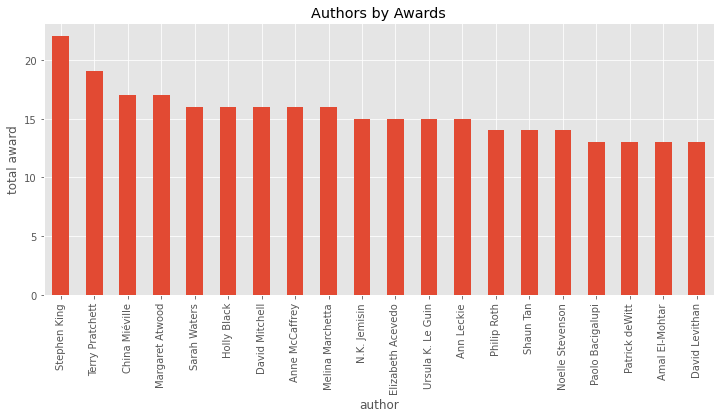

In [74]:
plt.style.use('ggplot')

def make_plot(df, x_label, y_label, title, n=all, kind='bar'):
    if n is all:
        n = df.shape[0]
    # _, ax = plt.subplots(figsize=(12,10))
    df.head(n).plot(kind=kind,legend=None,figsize=(12,5))
    plt.ylabel(y_label);
    plt.xlabel(x_label);
    plt.title(title);
    
    dd=pd.DataFrame(df.head(n)
    
    print(dd)
    # plt.xticks(rotation=50)

y_label = "total award"
x_label = "author"
title = "Authors by Awards"
df_data = df_author_awards
make_plot(df_data,x_label, y_label, title, 20)


### Sort by publishing year and get their mean average ratings

In [ ]:
year_ratings = df.groupby('original_publish_year')['minmax_norm_ratings'].mean().sort_values( ascending=False)
dic_year_ratings = dict(zip(year_ratings.index, year_ratings.values))

df_year_ratings = pd.DataFrame.from_dict(dic_year_ratings, orient='index')
df_year_ratings.head()

,0
1813.0,7.300
1921.0,7.140
2020.0,6.984
2018.0,6.860
1849.0,6.770


### Plot Years and their mean average ratings

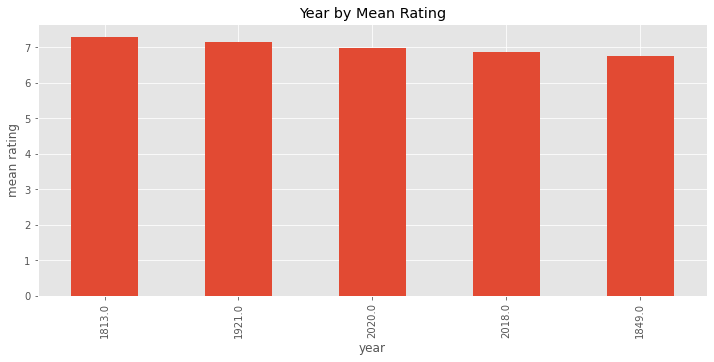

In [ ]:
y_label = "mean rating"
x_label = "year"
title = "Year by Mean Rating"
df_data = df_year_ratings
make_plot(df_data,x_label, y_label, title, 5)

### Sort by author and check who has highest average rating

In [ ]:
author_ratings = df.groupby('author')['avg_rating'].mean().sort_values( ascending=False)
dic_author_ratings = dict(zip(author_ratings.index, author_ratings.values))

df_author_ratings = pd.DataFrame.from_dict(dic_author_ratings, orient='index')
df_author_ratings.head()

,0
Jerry Weaver,4.98
Bill Watterson,4.77
Tyler Edwards,4.61
Juddy Anderson C. Punzalan,4.60
Kristin Hannah,4.57


### Plot Authors and their mean average ratings

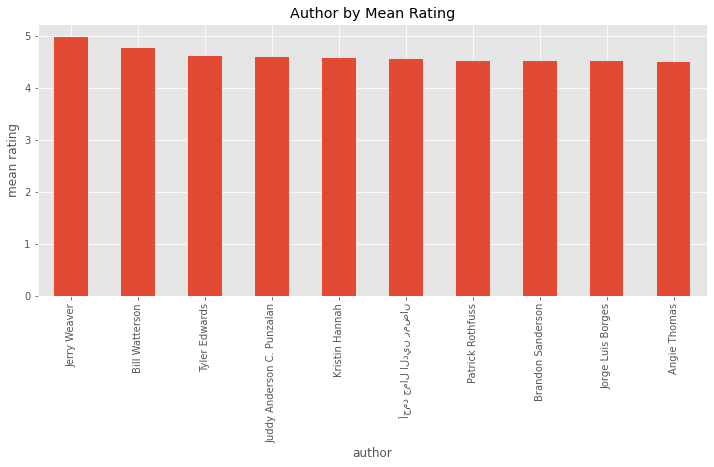

In [ ]:
y_label = "mean rating"
x_label = "author"
title = "Author by Mean Rating"
df_data = df_author_ratings
make_plot(df_data,x_label, y_label, title, 10)

### Check if book series are rated better than non series books

In [ ]:
series_ratings = df.groupby('series')['avg_rating'].mean().sort_values( ascending=False)
series_ratings

series
True     4.118919
False    4.046185
Name: avg_rating, dtype: float64

### Plot Series and their mean average ratings

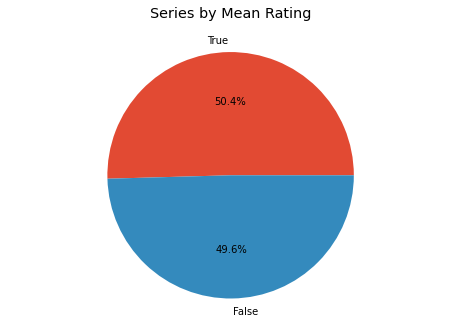

In [ ]:
title = "Series by Mean Rating\n"
pie_data=series_ratings.values
pie_labels=series_ratings.index.values

fig, ax = plt.subplots(figsize=(8,5))
plt.title(title);
ax.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', shadow=False)
ax.axis('equal');

### Check if book series are more ratings than non series books

In [ ]:
#df[ (df['num_ratings'] < df['num_ratings'].std()) & (df['avg_rating']>4) ].sort_values(by=['num_ratings'], ascending=[True])

series_size = df.groupby('series').size().sort_values( ascending=False)
series_size


series
False    755
True     509
dtype: int64

### Plot Series and their total number of ratings

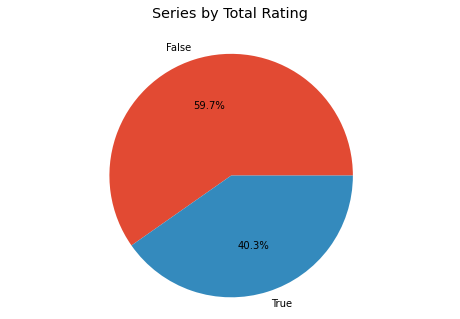

In [ ]:
title = "Series by Total Rating\n"
pie_data=series_size.values
pie_labels=series_size.index.values

fig, ax = plt.subplots(figsize=(8,5))
plt.title(title);
ax.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', shadow=False)
ax.axis('equal');


### Get genre and places total counts and mean average ratings

In [ ]:
df = df.replace({'places': {np.nan: '[]'}})

genres_rating = {}
genres_counts = {}

places_rating = {}
places_counts = {}

genres,places,avg_rating = df.genres, df.places, df.avg_rating

for id in range(len(avg_rating)):
    clean_genre = ast.literal_eval(genres[id])
    clean_places = ast.literal_eval(places[id])
    if len(clean_genre) != 0:
        for ng in clean_genre:
            for i in ng.split('>'):
                genr = i.strip()
                if genr in genres_rating:
                    genres_rating[genr].append(avg_rating[id])
                else:
                    genres_rating[genr] = [avg_rating[id]]
                if genr in genres_counts:
                    genres_counts[genr] += 1
                else:
                    genres_counts[genr] = 1
    #for places
    if len(clean_places) != 0:
        for cp in clean_places:
            plac = cp.strip()
            if plac in places_rating:
                places_rating[plac].append(avg_rating[id])
            else:
                places_rating[plac] = [avg_rating[id]]
            if plac in places_counts:
                places_counts[plac] += 1
            else:
                places_counts[plac] = 1

#genres
for g in genres_rating.keys():
    genres_rating[g] = np.round(np.mean(genres_rating[g]),decimals=3)

dic_genres_rating = dict(zip(genres_rating.keys(), genres_rating.values()))
df_genres_rating = pd.DataFrame.from_dict(dic_genres_rating, orient='index',\
    columns=['mean_ratings']).sort_values(by='mean_ratings',ascending=False)

dic_genres_counts = dict(zip(genres_counts.keys(), genres_counts.values()))
df_genres_counts = pd.DataFrame.from_dict(dic_genres_counts, orient='index',\
    columns=['total_counts']).sort_values(by='total_counts',ascending=False)

#places
for g in places_rating.keys():
    places_rating[g] = np.round(np.mean(places_rating[g]),decimals=3)

dic_places_rating = dict(zip(genres_rating.keys(), genres_rating.values()))
df_places_rating = pd.DataFrame.from_dict(dic_places_rating, orient='index',\
    columns=['mean_ratings']).sort_values(by='mean_ratings',ascending=False)

dic_places_counts = dict(zip(places_counts.keys(), places_counts.values()))
df_places_counts = pd.DataFrame.from_dict(dic_places_counts, orient='index',\
    columns=['total_counts']).sort_values(by='total_counts',ascending=False)

df_genres_rating.head()
df_genres_counts.head()

df_places_rating.head()
df_places_counts.head()


,total_counts
The United States of America,88
"London, England",75
"New York City, New York",64
England,61
United Kingdom,49


### Plot Genres and their mean average ratings

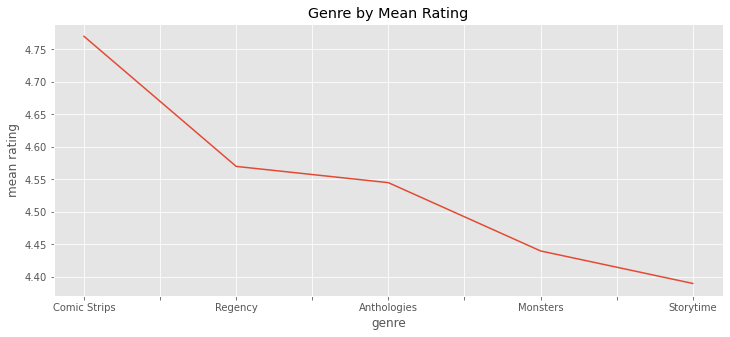

In [ ]:
y_label = "mean rating"
x_label = "genre"
title = "Genre by Mean Rating"
df_data = df_genres_rating
make_plot(df_data,x_label, y_label, title, 5, kind='line')

### Plot Genres and their total counts

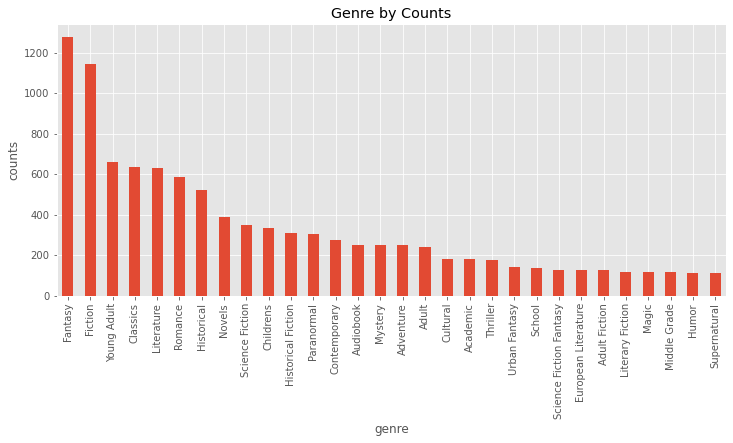

In [ ]:
y_label = "counts"
x_label = "genre"
title = "Genre by Counts"
df_data = df_genres_counts
make_plot(df_data,x_label, y_label, title, 30, kind='bar')

### Plot Places and their mean average ratings

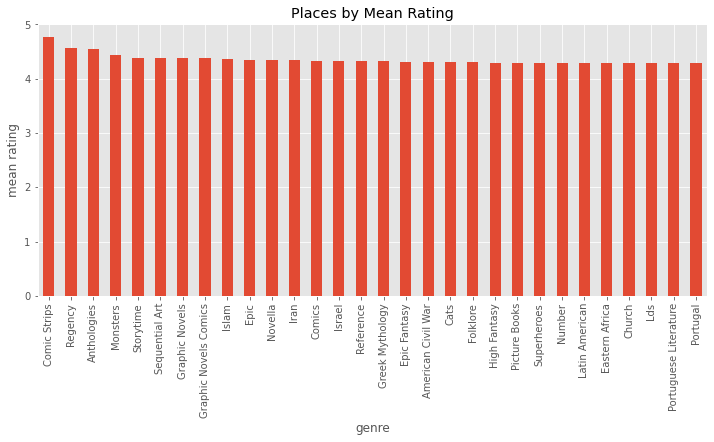

In [ ]:
y_label = "mean rating"
x_label = "genre"
title = "Places by Mean Rating"
df_data = df_places_rating
make_plot(df_data,x_label, y_label, title, 30, kind='bar')

### Plot Places and their total counts

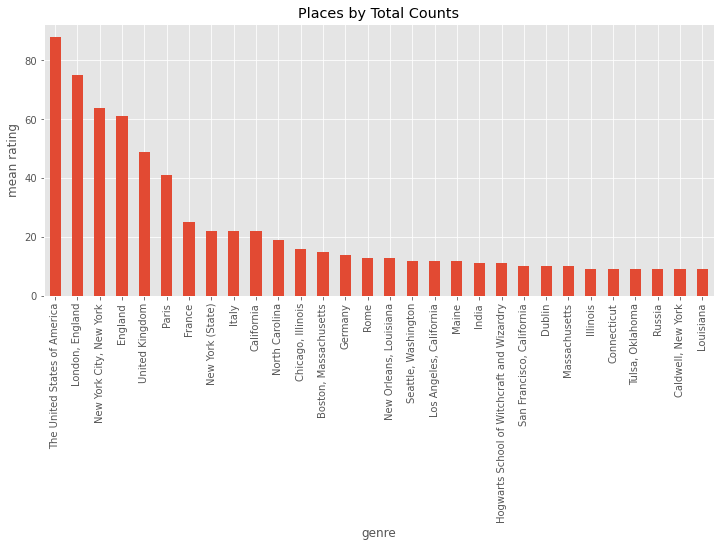

In [ ]:
y_label = "mean rating"
x_label = "genre"
title = "Places by Total Counts"
df_data = df_places_counts
make_plot(df_data,x_label, y_label, title, 30, kind='bar')

### Plot Average rating and Number of views

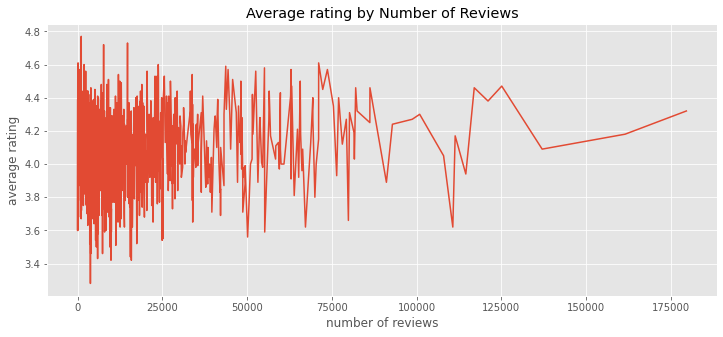

In [ ]:
views_ratings = df.groupby('author')['avg_rating'].mean().sort_values( ascending=False)
dic_views_ratings = dict(zip(df.num_reviews, df.avg_rating))

df_views_ratings = pd.DataFrame.from_dict(dic_views_ratings, orient='index').sort_index(ascending=False)
df_views_ratings.head()

y_label = "average rating"
x_label = "number of reviews"
title = "Average rating by Number of Reviews"
df_data = df_views_ratings
make_plot(df_data,x_label, y_label, title, n=all, kind='line')


### Plot Number of Pages and Year

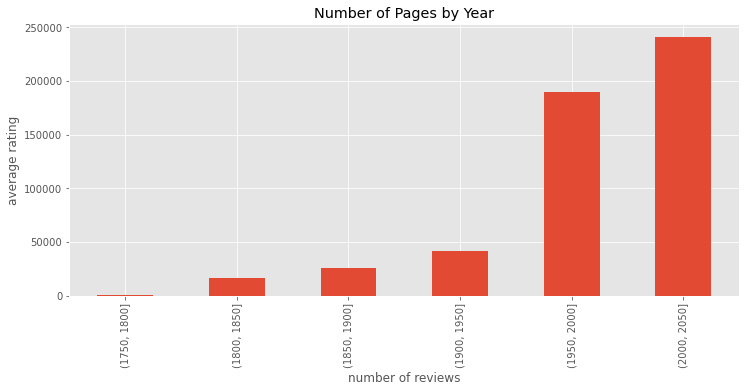

In [ ]:
df_year = df.original_publish_year
df[['original_publish_year','num_pages']].groupby(pd.cut(df_year, np.arange(df_year.min(), df_year.max()+1, 10))).sum()
d=df[['original_publish_year','num_pages']].groupby(by='original_publish_year').sum().sort_values('original_publish_year')
di = d.index.values

def plot_pages_year(df,start,end,interval,n=all,kind='bar'):
    df_year_pages = df.groupby(pd.cut(df.index, np.arange(start-interval, end+interval, interval))).sum()
    y_label = "average rating"
    x_label = "number of reviews"
    title = "Number of Pages by Year"
    make_plot(df_year_pages,x_label, y_label, title, n=n, kind=kind)

start=1800#di.min()
end=2020#di.max()
interval=50

plot_pages_year(d,start,end,interval,kind='bar')

In [12]:
df.iloc[0,:]['title']

'Snow'

### Display frequent occurring words in description

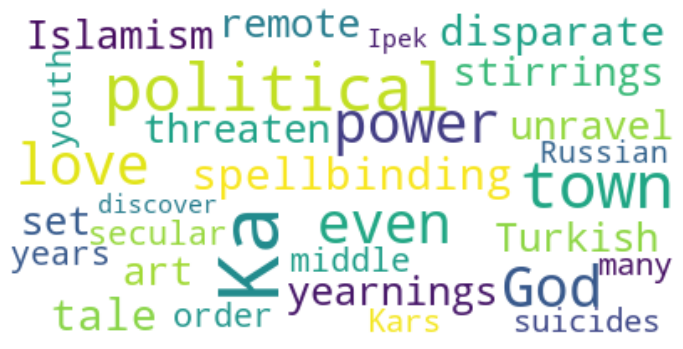

In [19]:
def text_by_image(df,option,count=100,id=all):
    # if id is all:
    #     text = ' '.join([str(d) for d in df])
    # else:
    #     text = df[id]
    text = df['description'][df.title == option].values[0]
    # print(text)

    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=count, background_color="white").generate(text)
    _, ax = plt.subplots(figsize=(12,10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
option = df.iloc[0,:]['title']
text_by_image(df,option,30,6)